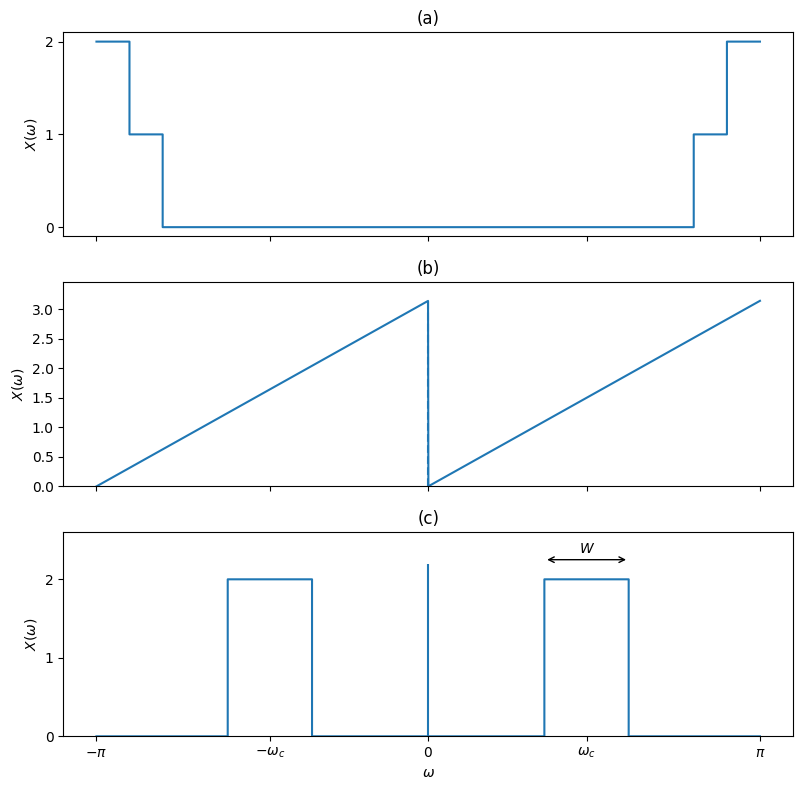

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Vector de frecuencias
w = np.linspace(-pi, pi, 2000)

# ============================================================
# (a) Espectro por tramos cerca de ±π
# ============================================================
Xa = np.zeros_like(w)

# Tramos (puedes ajustar amplitudes si tu enunciado dice otra cosa)
# |w| entre 8π/10 y 9π/10  → amplitud 1
# |w| entre 9π/10 y π      → amplitud 2
m1 = (np.abs(w) >= 0.8*pi) & (np.abs(w) < 0.9*pi)
m2 = (np.abs(w) >= 0.9*pi) & (np.abs(w) <= pi)

Xa[m1] = 1
Xa[m2] = 2

# ============================================================
# (b) Espectro en diente de sierra (rampa)
# ============================================================
Xb = np.zeros_like(w)

# De -π a 0: línea de 0 a π → Xb = w + π
m_left = (w >= -pi) & (w <= 0)
Xb[m_left] = w[m_left] + pi

# De 0 a π: línea de 0 a π → Xb = w
m_right = (w >= 0) & (w <= pi)
Xb[m_right] = w[m_right]

# ============================================================
# (c) Dos rectángulos centrados en ±ωc de ancho W
# ============================================================
wc = 1.5       # frecuencia central (ajústala como quieras)
W = 0.8        # ancho del rectángulo

Xc = np.zeros_like(w)
m_right_rect = (w >= wc - W/2) & (w <= wc + W/2)
m_left_rect  = (w >= -wc - W/2) & (w <= -wc + W/2)

Xc[m_right_rect | m_left_rect] = 2   # amplitud 2

# ============================================================
# Gráficas
# ============================================================
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# ---- (a) ----
ax = axes[0]
ax.step(w, Xa, where='mid')
ax.set_ylabel(r'$X(\omega)$')
ax.set_yticks([0, 1, 2])
ax.set_xticks([-pi, -0.9*pi, -0.8*pi, 0, 0.8*pi, 0.9*pi, pi])
ax.set_xticklabels([
    r'$-\pi$', r'$-\frac{9\pi}{10}$', r'$-\frac{8\pi}{10}$',
    r'$0$',
    r'$\frac{8\pi}{10}$', r'$\frac{9\pi}{10}$', r'$\pi$'
])
ax.set_title('(a)')

# ---- (b) ----
ax = axes[1]
ax.plot(w, Xb)
# Línea vertical en 0 para remarcar la discontinuidad
ax.vlines(0, 0, pi, linestyles='dashed')
ax.set_ylabel(r'$X(\omega)$')
ax.set_ylim(0, pi * 1.1)
ax.set_title('(b)')

# ---- (c) ----
ax = axes[2]
ax.step(w, Xc, where='mid')
ax.vlines(0, 0, 2.2, linestyles='solid')  # eje vertical
ax.set_ylabel(r'$X(\omega)$')
ax.set_xlabel(r'$\omega$')
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([-pi, -wc, 0, wc, pi])
ax.set_xticklabels([
    r'$-\pi$', r'$-\omega_c$', r'$0$', r'$\omega_c$', r'$\pi$'
])
ax.set_ylim(0, 2.6)
ax.set_title('(c)')

# Flecha que muestra el ancho W
ax.annotate(
    '', xy=(wc - W/2, 2.25), xytext=(wc + W/2, 2.25),
    arrowprops=dict(arrowstyle='<->')
)
ax.text(wc, 2.3, r'$W$', ha='center', va='bottom')

plt.tight_layout()
plt.show()
